<img src="Logo.png" width="100" align="left"/> 

# <center> Unit 3 Project </center>
#  <center> First section : Data cleaning  </center>

In this notebook you will be cleaning your dataset and making sure it's fully ready for modeling.

The used dataset is [Hepatitis C  dataset](https://www.kaggle.com/fedesoriano/hepatitis-c-dataset)

## Data preparation 
As a first step we need to prepare the data :

1. Read the data set as a data frame ( file name is HepatitisCdata.csv) 
2. The here are the column of your dataset:
    1) X (Patient ID/No.)
    2) Category (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis') ( the target ) 
    3) Age (in years)
    4) Sex (f,m)
    Attributes 5 to 14 refer to laboratory data:
    5) ALB : Albumin Blood Test
    6) ALP : Alkaline phosphatase
    7) ALT : Alanine Transaminase
    8) AST : Aspartate Transaminase
    9) BIL : Bilirubin
    10) CHE : Acetylcholinesterase
    11) CHOL : Cholesterol
    12) CREA : Creatinine 
    13) GGT : Gamma-Glutamyl Transferase
    14) PROT : Proteins
    
3. Remember your model only accepts numbers so make sure you deal properly with the missing values and the data types and justify your solution choices 
 
4. Make sure the dataset shape in the end is : rows 615 and  14 columns 
 
5. Once finished save the cleaned dataset as "clean_HepatitisC.csv" file 
 

In [103]:
import pandas as pd 
import numpy as np 

In [104]:
#To-Do: read the dataset 
data = pd.read_csv("./HepatitisCdata.csv")

In [105]:
print(data['Category'])

0      0=Blood Donor
1      0=Blood Donor
2      0=Blood Donor
3      0=Blood Donor
4      0=Blood Donor
           ...      
610      3=Cirrhosis
611      3=Cirrhosis
612      3=Cirrhosis
613      3=Cirrhosis
614      3=Cirrhosis
Name: Category, Length: 615, dtype: object


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [107]:
#To-Do  Start investigating the data types and correcting that 
# Provide explanation about each step in Markdown cells 
from sklearn.preprocessing import LabelEncoder

# transfering the sex data into integers ( male = 0  and female = 1 )  
data["Sex"] =pd.get_dummies(data["Sex"])["f"]
# '0=Blood Donor', '1=suspect Blood Donor', '2=Hepatitis', '3=Fibrosis', '4=Cirrhosis'
data["Category"] = LabelEncoder().fit_transform(data["Category"])


> Data types are all numeric Now ! Next we need to deal with missing values for the feature columns 

#To-Do list all the columns that contain missing values along with their counts 

In [108]:
# To-Do Start providing solutions for each column that has missing data 
# Treat each case seperately 
# Hint : no data row should be deleted 
# Provide evidence that you filled those missing values after each step 

In [109]:
#listing all the  columns that contain missing values along with their counts
for i in data.columns :
    if data[i].isna().any() :
        print(i,"column contains %d missing value"%data[i].isnull().sum())

ALB column contains 1 missing value
ALP column contains 18 missing value
ALT column contains 1 missing value
CHOL column contains 10 missing value
PROT column contains 1 missing value


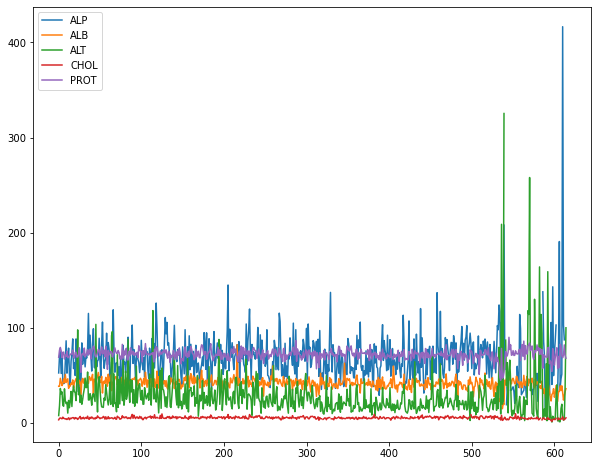

In [110]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))

#whene we have high variance we replace mv by the mode and when we have low variance we replace it by the mean

plt.plot(data['ALP'] , label = "ALP")
data['ALP'].fillna(data['ALP'].mode()[0] , inplace = True ) 

plt.plot(data['ALB'], label = "ALB")
data['ALB'].fillna(data['ALB'].mode()[0] , inplace = True ) 

plt.plot(data['ALT'], label = "ALT")
data['ALT'].fillna(data['ALT'].mean() , inplace = True ) 

plt.plot(data['CHOL'], label = "CHOL")
data['CHOL'].fillna(data['CHOL'].mean() , inplace = True ) 

plt.plot(data['PROT'], label = "PROT")
data['PROT'].fillna(data['PROT'].mean(), inplace = True ) 


plt.legend()
plt.show()


In [111]:
#treating cases : 
# function to get rows that are close in values with the missing value we want to fill than return the average of their 
# values(for the missing variable)
#def getnearest(row,column_name,step) :
#    value = 0 
#    ran = 0 
#    while(value==0):
#        ran+=step
#        array_of_simlair_rows = list()
#        mean = 0 
#        d = data.drop(columns=column_name , inplace = False)
#        d.dropna(inplace=True,axis=0)
#        target_row = data.drop(columns=column_name,inplace = False).iloc[row]
#       for i in range(d.shape[0]):
#            if (d.iloc[i] <= target_row.fillna(data.max().max())+ran).all() and (d.iloc[i] >= target_row.fillna(data.min().min())-ran).all() and i!= row :
#                array_of_simlair_rows.append(i) 
#        for i in array_of_simlair_rows:
#            value += data.iloc[i][column_name]
#        value = ( value / len(array_of_simlair_rows)) if len(array_of_simlair_rows)!=0 else 0 
#    return value 

In [112]:
#geting missing r&c whith nans
#import math
#col_row_nan = list()
#for i, r in data.iterrows():
#    is_nan_series = r.isnull()
#    if is_nan_series.any():
#        for c in data.columns : 
#            if math.isnan(data[c][i]) : 
#                col_row_nan.append([c,i])
#col_row_nan

In [113]:
#for col , row in col_row_nan :  
#    data[col].fillna(getnearest(row,col,5) , inplace = True ) 

> We have no more missing data
As an optional thing we can also rename the first column as 'index' or "ID" instead of Unnamed 

In [114]:
data.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [115]:
data.rename(columns={'Unnamed: 0': "ID"}, inplace=True)

In [116]:
data.columns

Index(['ID', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL',
       'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [117]:
data['Category']

0      0
1      0
2      0
3      0
4      0
      ..
610    4
611    4
612    4
613    4
614    4
Name: Category, Length: 615, dtype: int32

### 6. Save the clean dataset :

In [118]:
# Don't forget to drop the index 
data.to_csv('clean_HepatitisC.csv', index=False)